# Uncertainty in Estimation
In the previous section, we took a detour into the philosophy of science and the logical ground upon which statistical inference is based. For the moment, let us put that discussion to one side and get back to our statistical model. We will see where the problem of induction comes into play when we start discussing null hypothesis significance testing later in the lesson.

As a reminder, the aim of our statistical model is to estimate *population quantities* from a sample. Our interest is in the population, not in the specific sample we have available. The sample is simply a *proxy* for the population. If we have the whole population available, there would be no need for inference and our job would be done. Given that this is almost never practical, we need some method for trying to say something about the population based on the information in the sample.


## Parameter Estimates as Random Variables

```{figure} images/darts-analogy.png
---
scale: 75%
align: right
---
```

The observation that is key to understanding statistical inference is recognising that our parameter *estimates* are *random variables*. Remember that in classical Frequentist inference the population parameters are fixed constants. For every sample we draw from the population, we can use a method such as Maximum Likelihood to *estimate* those population constants. However, these estimates will change with every new sample we take. You can think of this like throwing darts at a dart board. If the bullseye represents the true population value, every time we take a sample and produce an estimate we are throwing a dart at the board. Sometimes we will hit the bullseyes, other times we might be close and other times we might be far away. Over time, a distribution of darts will emerge. If we are doing well, the hope is that most of our darts are close to the bullseye with fewer of them further away[^jokefoot]. 

Remembering back to earlier in this unit, a variables whose value changes every time we measure it is known as a *random variable*. As such, the parameter estimates can be characterised as random variables, meaning that each estimate is associated with some probability distribution that indicates:

1. What the *average* value of the estimate is across different samples (the expected value)
2. How *variable* the value of the estimate will be across difference samples (the variance)

Ideally, these distribution would have a variance that is as small as possible so that the estimates do not change much from sample-to-sample. In addition, we would like these distributions to have a mean equal to the population value so that, on average, we are capturing the true value of the parameters. In the dartboard analogy, we hope that most of our throws are clustered on or close to the bullseye, with fewer throws further away. These two conditions are known as *efficiency* and *bias*. The best estimates that we can hope for are both *efficient* (minimal variance) and *unbiased* (mean is the true value). Unfortunately, there is a tension between these conditions known as the *variance-bias trade-off*, which we will explore a little later. 

### Demonstration in `R`
Before getting into more detail, we can illustrate the idea of estimates being random variables in `R`. In the code below, we simulate 1,000 repeats of sampling 100 values from 

$$
y \sim \mathcal{N}\left(5,2\right)
$$

You can think of this as repeating the same experiment 1,000 times, where each repeat consists of a different sample of 100 subjects. Every time we perform the experiment, we calculate the mean of that sample of 100 subjects to give an estimate of the population mean $\mu$. Over the 1,000 repeats, we therefore build a collection of 1,000 values of $\hat{\mu}$. Because each sample will result in a different value for $\hat{\mu}$, we can use these repeats to view the *distribution* of $\hat{\mu}$

In [19]:
options(repr.plot.width=12, repr.plot.height=7)

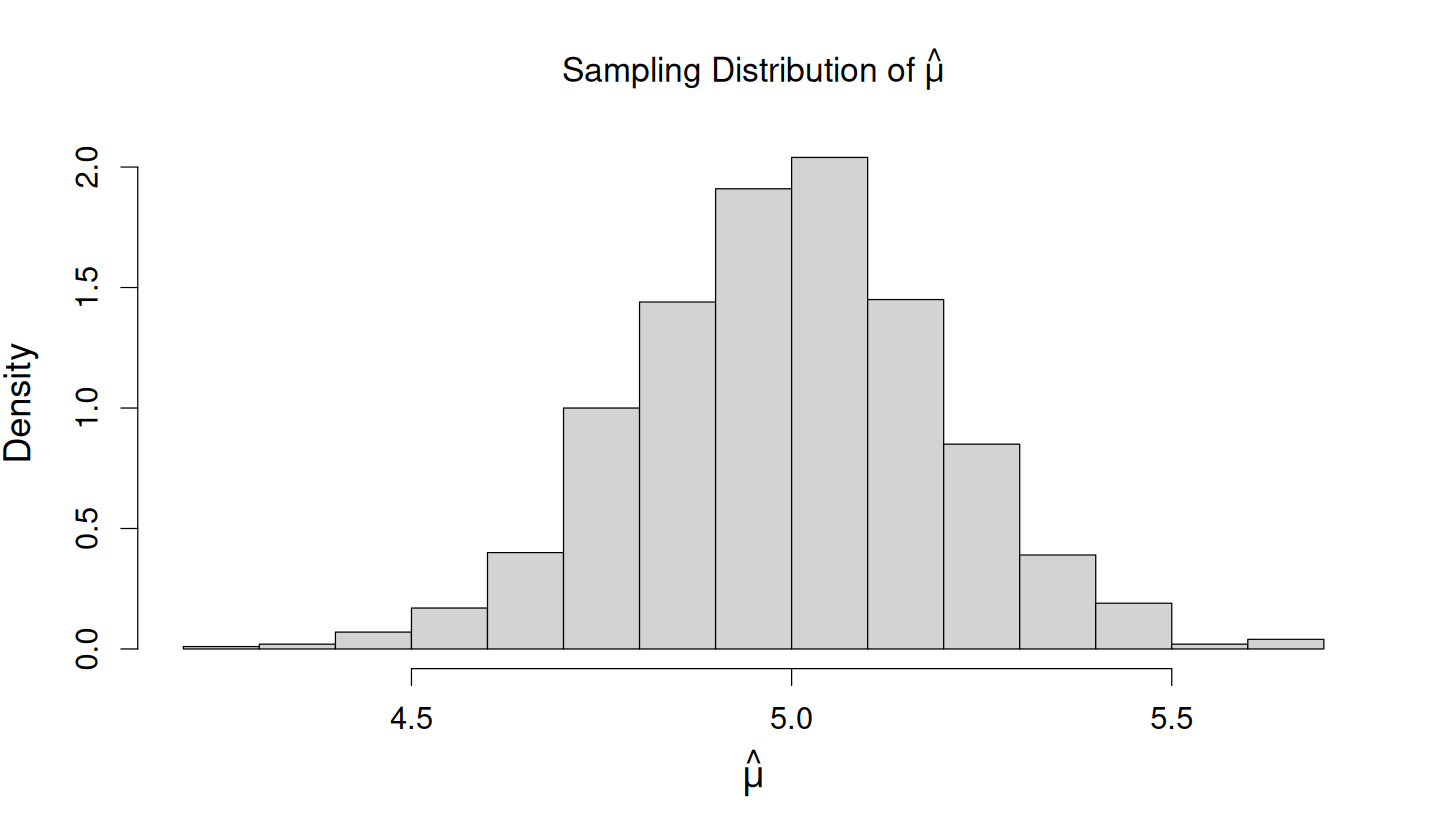

In [29]:
set.seed(999)

mu     <- 5             # True mean
sigma  <- 2             # True standard deviation
nsamps <- 1000          # Consider 1,000 different samples
n      <- 100           # Each sample will consist of 100 observations
mu.hat <- rep(0,nsamps) # Array for saving each estimate of mu

for (i in 1:nsamps){
    y         <- rnorm(n, mean=mu, sd=sigma) # Simulate a sample from the population
    mu.hat[i] <- mean(y)                     # Estimate mu and save it
}

# Histogram of the sampling distribution
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
hist(mu.hat, probability=TRUE,  
     main=expression("Sampling Distribution of " * hat(mu)), 
     xlab=expression(hat(mu)))

We can also examine the empirical mean and standard deviation of this sampling distribution

In [30]:
print(mean(mu.hat))
print(sd(mu.hat))

[1] 4.995861
[1] 0.2022037


Notice that the expected value is basically the true value of $\mu$, indicating that our estimate of the mean is *unbiased*. Notice, as well, that the standard deviation of the sampling distribution is *much smaller* than the standard deviation of the population distribution. This is an important point for inference, as we will discuss below. You may have also noticed that the sampling distribution looks a lot like a normal distribution. In fact, it *is* a normal distribution! One of the most useful results from assuming that the population distribution is normal is that it makes it easy to work out what the distribution of the estimates will be. We will discuss this in more detail below. For now, just make sure you understand the idea that parameter estimates are random variables with some distribution reflecting how their value will change across different samples.

## Sampling Distributions and the Standard Error
The probability distributions of the parameters estimates play a central role in statistical inference and so are given a special names. These distributions are known as *sampling distributions*. So, we have *population distributions*, which represent our theoretical data-generating process, and we have *sampling distributions*, which represent how quantities associated with the data-generating process change with each new sample. In the example above, this was a simple estimate of the mean. However, any value we can calculate that changes with each sample can be characterised as a random variable with some sampling distribution. For our current purpose, knowing the sampling distribution of the estimates is key because it tells us whether the estimate is biased, but also how *uncertain* we are about our estimated values. Because this characterisation of uncertainty is key for inference, the standard deviation of a sampling distribution is also given a special name. This is known as the *standard error*. Students often confuse the role and interpretation of the standard error compared to the standard deviation, so make sure this is clear to you. This is explored more in the box below.


```{admonition} Standard Error vs Standard Deviation
:class: tip
Understanding what the standard error is, and how it differs from the standard deviation, is crucial. Students often get these muddled, particularly when trying to decide what to use as error bars on a graph. The standard deviation of a set of data represents the *raw variability* in that data. It is specific to that sample and indicates how far, on average, each data point is from the mean. The *standard error*, on the other hand, is the theoretical variability of the sampling distribution of some estimate from that sample. This tells us how *variable* the estimate is likely to be, on average. So the *standard deviation* tells us about the sample, whereas the *standard error* tells us about an estimate. We are either trying to represent the average variability of the data we have collected, or how precise one of our estimates is. The standard deviation is therefore more relevant for *descriptive statistics*, whereas the standard error is more relevant for *inferential statistics*. If you are ever confused about which to use for error bars in a plot, think about the *purpose* of the plot. Are you trying to display the sample descriptively, with an indication of how variable those specific subjects are? If so, use the *standard deviation*. Alternatively, if you are trying to display inferential results, such as significant differences between groups, or if you are trying to indicate the precision of the model estimates, use the *standard error*
```

## Sampling Distributions of Estimates from Linear Models


Because the randomness in the data is a direct consequence of the assumed population distribution, this randomness is "passed-down" to the estimation process. If we use a simple regression model as an example

statistical theory tells us that, due to the assumption of a normal population distribution, the sampling distribution of the slope estimate will be 

$$
\hat{\beta}_{1} \sim \mathcal{N}\left(\beta_{1},\frac{\sigma^{2}}{\sum{\left(x_{i} - \bar{x}\right)^{2}}}\right).
$$

Importantly, this shows that the estimate from either OLS of MLE is *unbiased* because $E\left(\hat{\beta}_{1}\right) = \beta_{1}$. In other words, on average our estimate will be correct. We leave discussion of the variance term until further below, because this is a little more complex. However, it can be useful here to demonstrate that this derivation is correct using some `R` code.

In [53]:
set.seed(777)

beta.0     <- 2
beta.1     <- 3
sigma      <- 5
n          <- 50
n.sims     <- 1000
x          <- runif(n,0,10)
beta.1.hat <- rep(0,n.sims)

for (i in 1:n.sims){
    y             <- rnorm(n, mean=beta.0 + beta.1*x, sd=sigma)
    mod           <- lm(y ~ x)
    beta.1.hat[i] <- coef(mod)[2]
}

# Compare theoretical and empirical values
theory.var  <- sigma^2 / sum((x - mean(x))^2)
theory.mean <- beta.1
empiri.var  <- var(beta.1.hat)
empiri.mean <- mean(beta.1.hat)

df <- data.frame(Derivation=c("Theoretical", "Empirical"), 
                 Mean=c(theory.mean, empiri.mean), 
                 Var=c(theory.var, empiri.var))
print(df)

   Derivation     Mean        Var
1 Theoretical 3.000000 0.06241401
2   Empirical 2.991841 0.06256051


We can see here that the theoretical values for the mean and standard error of the sampling distribution agree with those calculated through simulation. We can also visualise the theoretical normal sampling distribution on top of the empirical sampling distribution to show their correspondance.

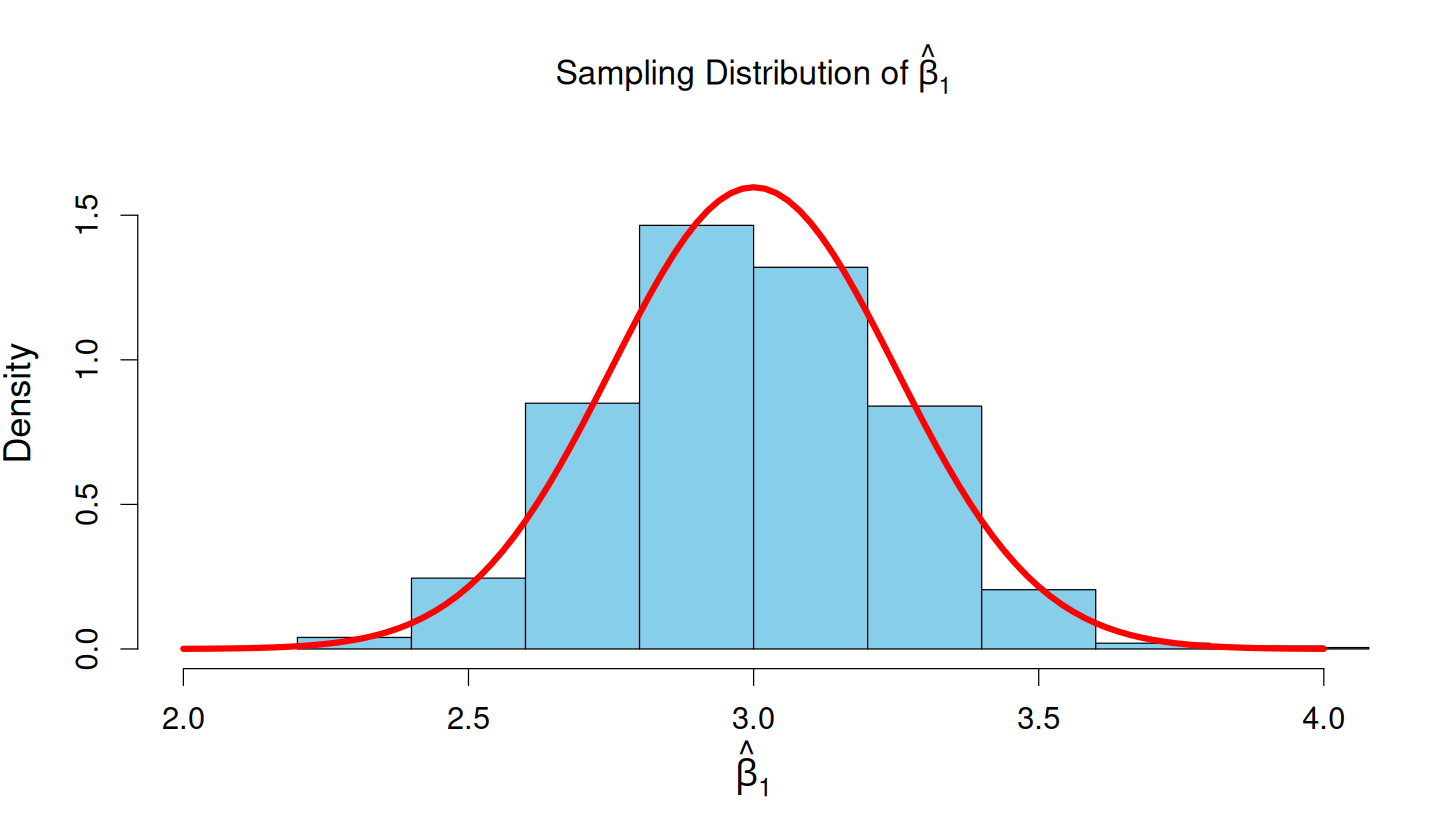

In [46]:
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling

# Plot histogram of sampling distribution
hist(beta.1.hat, probability=TRUE, col="skyblue", ylim=c(0,1.7), xlim=c(2,4), 
    main=expression("Sampling Distribution of " * hat(beta)[1]),
    xlab=expression(hat(beta)[1]))

# Add a normal density curve with the theoretical mean and standard error
curve(dnorm(x, mean=theory.mean, sd=sqrt(theory.var)), 
      col="red", lwd=5, add=TRUE)

So, the main take-away here is that the theory works and that the form of the sampling distribution for $\hat{\beta}_{1}$ is known and can be derived mathematically. However, it is important to recognise that this depends upon the population distribution being normal[^cltfoot].

### Understanding the Standard Error

So we are scaling the *vertical spread* by the *horizontal spread*. 

A good analogy is how trying to estimate the slope of the hill depends on how far up the hill you walk. If you only take measurements over a very short section, it will be hard to tell how steep the hill really is. However, if you you walk from the base to the top, you will be able to estimate the slope much more reliably. Furthermore, if you take many measurements from the bottom to the top, you will have a much better picture of the steepness of the slope, rather than taking fewer measurements. So the precision of your estimate depends upon both how far you walk (the *range* of $x$) and how many measurements you take along the way (the sample size $n$). 

The other element of this is that it depends on the amount of data we have. Notice that the value in the denominator is a *sum*, rather than an average. As such, it gets bigger the more data we have we can make this more explicit by writing

$$
\text{Var}\left(\hat{\beta}_{1}\right) = \frac{\sigma^{2}}{(n-1)s^{2}_{x}},
$$

where $s^{2}_{x}$ indicates the variance of $x$. The multiplication of the $(n-1)$ term essentially undoes the averaging when calculating the variance

$$
(n-1)s^{2}_{x} = (n-1) \frac{\sum{(x_{i} - \bar{x})^{2}}}{n-1} = \sum{(x_{i} - \bar{x})^{2}}
$$

but writing it this way makes the dependence on the sample size clearer. To put it simply, the *bigger* the sample size the *larger* the denominator becomes and the *smaller* the standard error. To put it even more simply, more data makes our estimate more precise.

This makes intuitive sense. The more data we have, the closer we are to having the full population at our disposal and thus the better our estimate of the population value should be. To make our estimate as precise as possible we want both a wide-spread of $x$ values, as well as more data. Typically only the sample size is under our control and thus our aim is usually for as much data as possible. We can demonstrate this dependance in `R` using simulations. In the code below, we simulate sample sizes of 5, 10, 50, 100, 1000 and 5000. For each sample size we run 1000 simulations of a simple regression model with known population values. We build up a distribution of estimates and then visualise them as histograms. Importantly, we fix the $x$-axis range so that these can be accurately compared.

In [51]:
options(repr.plot.width=14, repr.plot.height=10)

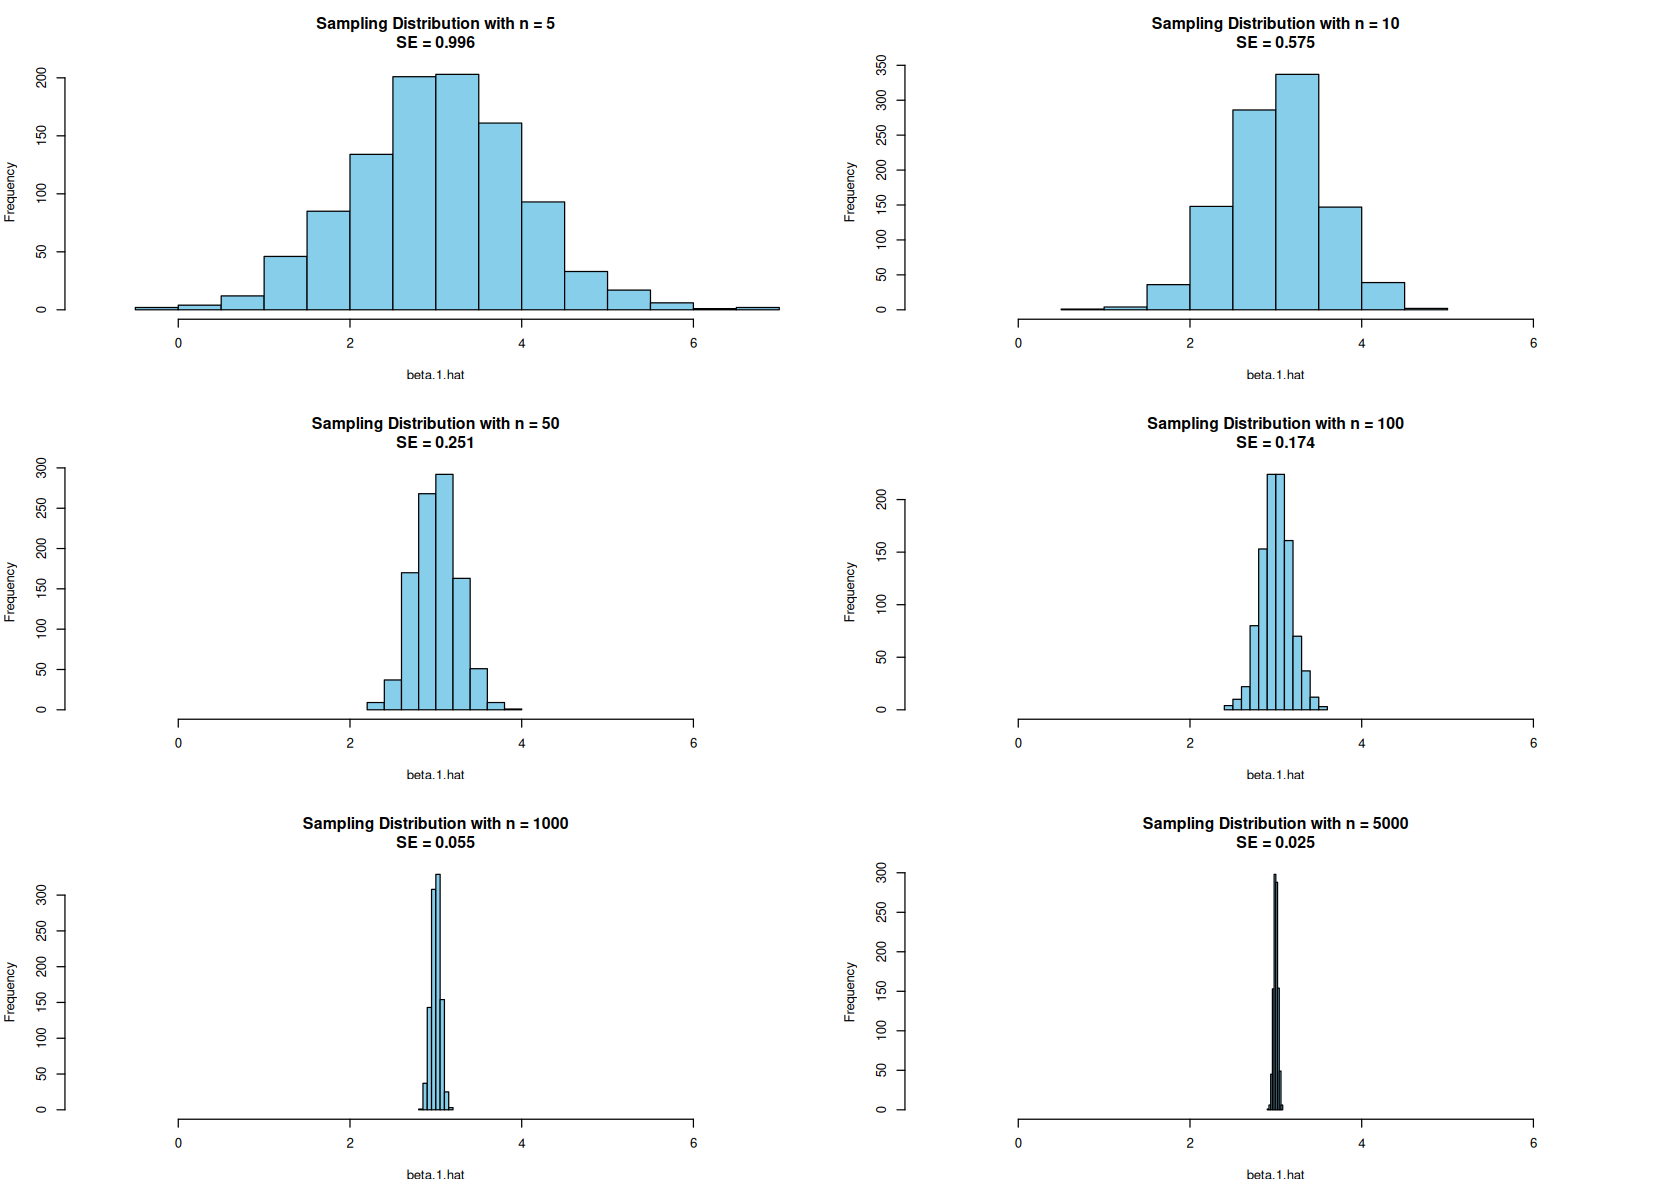

In [52]:
set.seed(777)

beta.0     <- 2
beta.1     <- 3
sigma      <- 5
n.sims     <- 1000
n          <- c(5,10,50,100,1000,5000)

par(mfrow=c(3,2))

for (i in 1:length(n)){
    x          <- runif(n[i],0,10)
    beta.1.hat <- rep(0,n.sims)

    for (j in 1:n.sims){
        y             <- rnorm(n[i], mean=beta.0 + beta.1*x, sd=sigma)
        mod           <- lm(y ~ x)
        beta.1.hat[j] <- coef(mod)[2]
    }

    SE    <- round(sd(beta.1.hat),3)
    title <- paste0("Sampling Distribution with n = ", n[i], "\nSE = ", SE)  
    hist(beta.1.hat, xlim=c(-1,7), main=title, col="skyblue")
}

The shrinking width of the sampling distribution as $n$ increases should be very clear. Although each of these distributions are centred on the true value, their variability differs wildly. As such, our confidence in the precision of our estimates changes dramatically as we get more and more data. When $n = 5$, we expect our estimate to differ from the true value by an average of 0.996 units. However, when $n = 5000$, we expect our estimate to differ from the true value by an average of 0.025 units. It should be clear that we are more likely to trust our estimate to be close to the true value when we have more data.

### The Intercept and Variance
What about the sampling distributions of our other estimates, namely $\hat{\beta}_{0}$ and $\hat{\sigma}^{2}$? Like $\hat{\beta}_{1}$, under assumptions of population normality, these can be derived mathematically to give:

$$
$$

Because these values are generally of less interest directly for inference, we will not demonstrate the correctness of these results through simulation. However, this could be an exercise if you want to alter the code above to demonstrate how well the theory works.

### Example in `R` with Real Data
We can see how `R` reports the standard errors of the estimates in the output from `lm()` by returning to the `mtcars` example.

[^jokefoot]: Three statisticians go deer hunting with bows and arrows. They spot a big buck and take aim. One shoots and his arrow flies off three meters to the right. The second shoots and his arrow flies off three meters to the left. The third statistician jumps up and down yelling: "We got him! We got him!".

[^cltfoot]: This reliance on normality is not always needed. As we will explore next week, the central limit theorem indicates that under large-enough sample sizes, the sampling distribution will be normal, even if the population distribution is not.